## Importing the relevant packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
url = './ignore/S3/L11/Index2018.csv'
raw_csv_data = pd.read_csv(url) 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [3]:
df['market_value']=df.ftse

In [4]:
#del df['spx']
#del df['dax']
#del df['ftse']
#del df['nikkei']
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [5]:
# import warnings
# warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df_train['returns'] = df_train.market_value.pct_change(1)*100

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_40428/3020228530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df_train.market_value.pct_change(1)*100


## ARIMA(1,1,1)

In [12]:
price_arima_111 = ARIMA(df_train['market_value'], order=(1,1,1))
results_price_arima_111 = price_arima_111.fit()
print(results_price_arima_111.summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Wed, 04 Jan 2023   AIC                          55214.010
Time:                        20:02:14   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.654      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.925      0.000      -0.896      -0.688
sigma2      3498.7412     40.932     85.477      0.0

## Residuals of the ARIMA(1,1,1)

(-500.0, 500.0)

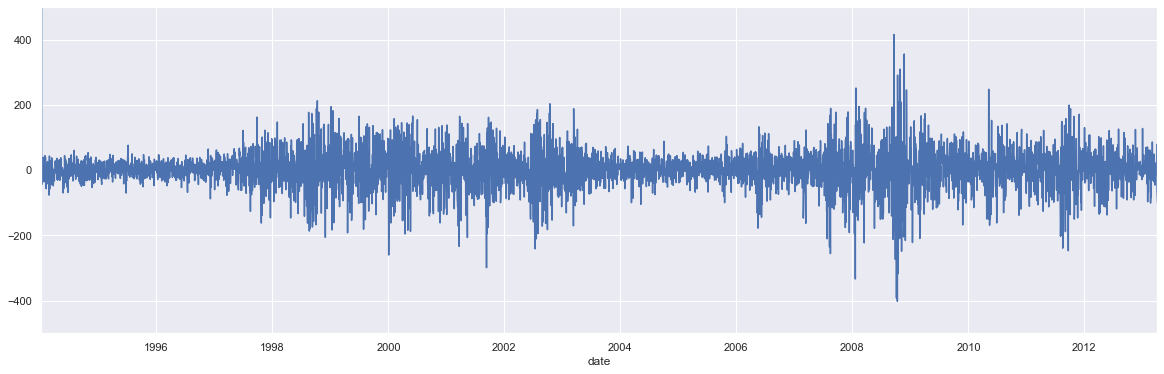

In [16]:
results_price_arima_111.resid.plot(figsize=(20, 6))
plt.ylim(-500, 500)

(-0.1, 0.1)

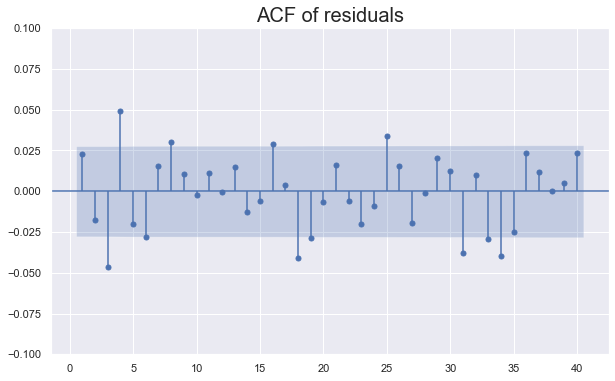

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_price_arima_111.resid[1:], lags=40, zero=False, ax=ax)
plt.title("ACF of residuals", size=20)
plt.ylim(-0.1, 0.1)

## Higher-Lag ARIMA Models

    ARIMA(1,1,2), ARIMA(1,1,3), ARIMA(2,1,1), ARIMA(3,1,1), ARIMA(3,1,2)

In [25]:
price_arima_112 = ARIMA(df_train['market_value'], order=(1,1,2))
results_price_arima_112 = price_arima_112.fit()

In [26]:
price_arima_113 = ARIMA(df_train['market_value'], order=(1,1,3))
results_price_arima_113 = price_arima_113.fit()

In [27]:
price_arima_211 = ARIMA(df_train['market_value'], order=(2,1,1))
results_price_arima_211 = price_arima_211.fit()

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [29]:
price_arima_311 = ARIMA(df_train['market_value'], order=(3,1,1))
results_price_arima_311 = price_arima_311.fit()

In [30]:
price_arima_312 = ARIMA(df_train['market_value'], order=(3,1,2))
results_price_arima_312 = price_arima_312.fit()

In [39]:
print(f"ARIMA(1,1,1) {results_price_arima_111.llf}, {results_price_arima_111.aic}")
print(f"ARIMA(1,1,2) {results_price_arima_112.llf}, {results_price_arima_112.aic}")
print(f"ARIMA(1,1,3) {results_price_arima_113.llf}, {results_price_arima_113.aic}, best model")
print(f"ARIMA(2,1,1) {results_price_arima_211.llf}, {results_price_arima_211.aic}")
print(f"ARIMA(3,1,1) {results_price_arima_311.llf}, {results_price_arima_311.aic}")
print(f"ARIMA(3,1,2) {results_price_arima_312.llf}, {results_price_arima_312.aic}")

ARIMA(1,1,1) -27604.00510530288, 55214.01021060576
ARIMA(1,1,2) -27600.407632540606, 55208.81526508121
ARIMA(1,1,3) -27590.72348194477, 55191.44696388954, best model
ARIMA(2,1,1) -27600.13055105199, 55208.26110210398
ARIMA(3,1,1) -27592.336116474555, 55194.67223294911
ARIMA(3,1,2) -27590.920318067627, 55193.84063613525


(-0.1, 0.1)

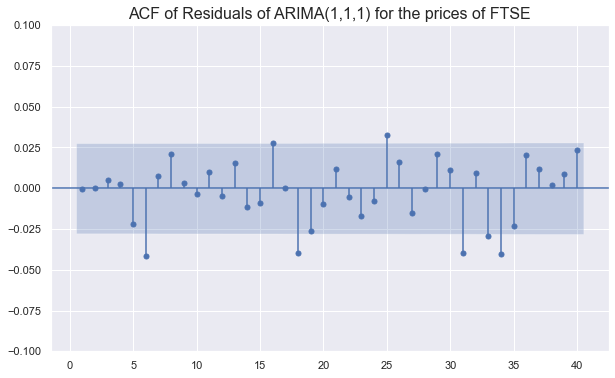

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_price_arima_113.resid[1:], lags=40, zero=False, ax=ax)
plt.title("ACF of Residuals of ARIMA(1,1,1) for the prices of FTSE", size=16)
plt.ylim(-0.1, 0.1)

In [40]:
price_arima_511 = ARIMA(df_train['market_value'], order=(5,1,1))
results_price_arima_511 = price_arima_511.fit()
price_arima_613 = ARIMA(df_train['market_value'], order=(6,1,3))
results_price_arima_613 = price_arima_613.fit()

In [41]:
print(f"ARIMA(1,1,3) {results_price_arima_113.llf}, {results_price_arima_113.aic}")
print(f"ARIMA(5,1,1) {results_price_arima_511.llf}, {results_price_arima_511.aic}")
print(f"ARIMA(6,1,3) {results_price_arima_613.llf}, {results_price_arima_613.aic}")

ARIMA(1,1,3) -27590.72348194477, 55191.44696388954, best model
ARIMA(5,1,1) -27586.844609581243, 55187.68921916249
ARIMA(6,1,3) -27583.858499814625, 55187.71699962925


(-0.1, 0.1)

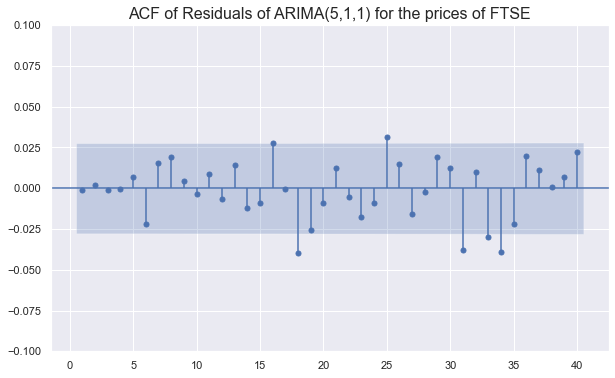

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(results_price_arima_511.resid[1:], lags=40, zero=False, ax=ax)
plt.title("ACF of Residuals of ARIMA(5,1,1) for the prices of FTSE", size=16)
plt.ylim(-0.1, 0.1)

In [43]:
print(results_price_arima_511.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Fri, 06 Jan 2023   AIC                          55187.689
Time:                        16:15:14   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.0

## Models with Higher Levels of Integration

In [44]:
df_train['delta_prices'] = df_train['market_value'].diff(1)
df_train.head()

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_40428/415468101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['delta_prices'] = df_train['market_value'].diff(1)


,spx,dax,ftse,nikkei,market_value,returns,delta_prices
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,-5.40
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,-26.81
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,-41.75
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,-12.01


In [47]:
delta_arima111 = ARIMA(df_train['delta_prices'], order=(1,1,1))
results_delta_arima111 = delta_arima111.fit()
print(results_delta_arima111.summary())

                               SARIMAX Results                                
Dep. Variable:           delta_prices   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27622.053
Date:                Fri, 06 Jan 2023   AIC                          55250.106
Time:                        16:19:43   BIC                          55269.670
Sample:                    01-07-1994   HQIC                         55256.961
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0178      0.010     -1.808      0.071      -0.037       0.001
ma.L1         -0.9998      0.002   -530.588      0.000      -1.004      -0.996
sigma2      3513.8570     40.926     85.859      0.0

In [49]:
sts.adfuller(df_train['delta_prices'][1:])

(-32.24409349570758,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [50]:
df_train['delta2_prices'] = df_train['delta_prices'].diff(1)
df_train.head()

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_40428/3439472549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['delta2_prices'] = df_train['delta_prices'].diff(1)


,spx,dax,ftse,nikkei,market_value,returns,delta_prices,delta2_prices
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,-5.40,NaN
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,-26.81,-21.41
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,-41.75,-14.94
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,-12.01,29.74


(-0.2, 0.2)

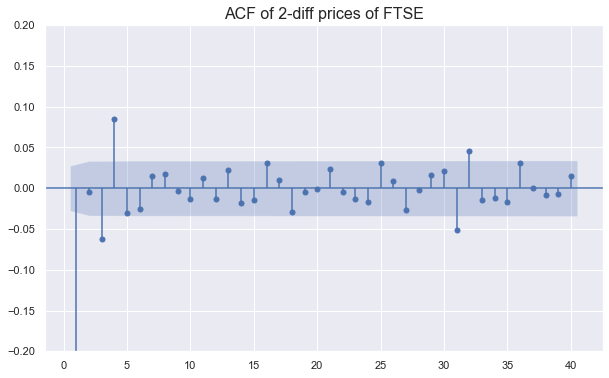

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_acf(df_train['delta2_prices'][2:], lags=40, zero=False, ax=ax)
plt.title("ACF of 2-diff prices of FTSE", size=16)
plt.ylim(-0.2, 0.2)

Text(0.5, 1.0, 'PACF of 2-diff prices of FTSE')

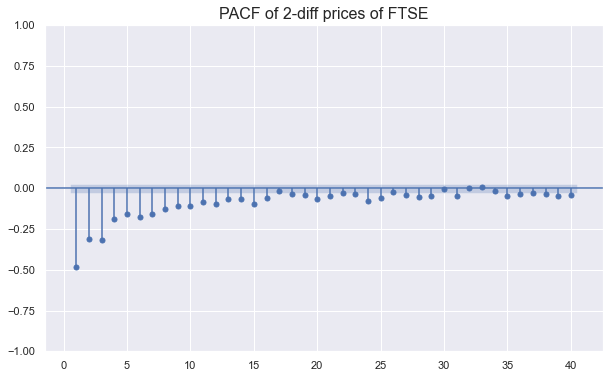

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
sgt.plot_pacf(df_train['delta2_prices'][2:], lags=40, zero=False, method='ols', ax=ax)
plt.title("PACF of 2-diff prices of FTSE", size=16)


In [57]:
test = ARIMA(df_train['delta2_prices'][2:], order=(1,2,1))
print(test.fit().summary())

/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          delta2_prices   No. Observations:                 5019
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -30673.955
Date:                Fri, 06 Jan 2023   AIC                          61353.910
Time:                        16:31:45   BIC                          61373.471
Sample:                    01-11-1994   HQIC                         61360.764
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6615      0.007    -93.481      0.000      -0.675      -0.648
ma.L1         -1.0000      0.221     -4.527      0.000      -1.433      -0.567
sigma2      1.195e+04   2644.984      4.516      0.0

In [62]:
min_p = 0
min_q = 0
min_aic = 9999999
min_llf = -9999999
for p in range(1, 4):
    for q in range(1, 4):
        print(p,q)
        if p == 3 and q == 2:
            print("passed because of LU decomposition error")
        else:
            model = ARIMA(df_train['delta2_prices'][2:], order=(p,2,q))
            if model.fit().aic < min_aic and model.fit().llf > min_llf:
                min_p = p
                min_q = q
                min_aic = model.fit().aic
                min_llf = model.fit().llf

1 1


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2
1 3


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 4
1 5


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 1
2 2
2 3
2 4


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 5
3 1
3 2
passed because of LU decomposition error
3 3
3 4
3 5


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 1
4 2
4 3
4 4


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 5


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


5 1
5 2
5 3


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 4


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 5


/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    seems like ARIMA(1,2,4 is the best model)

In [64]:
print(min_p, min_q, min_aic, min_llf)

1 4 55391.598178991066 -27689.799089495533


## ARIMAX 

In [65]:
price_arima111_xspx = ARIMA(df_train['market_value'], exog=df_train['spx'], order=(1,1,1))
results_price_arima111_xspx = price_arima111_xspx.fit()
print(results_price_arima111_xspx.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Fri, 06 Jan 2023   AIC                          53394.784
Time:                        16:54:10   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.0

In [74]:
exog = df_train.loc[:, ['spx', 'dax']]
# exog.head()

In [75]:
price_arima111_xspx = ARIMA(df_train['market_value'], exog=exog, order=(1,1,1))
results_price_arima111_xspx = price_arima111_xspx.fit()
print(results_price_arima111_xspx.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25009.403
Date:                Fri, 06 Jan 2023   AIC                          50028.806
Time:                        17:38:15   BIC                          50061.412
Sample:                    01-07-1994   HQIC                         50040.231
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            0.4299      0.031     14.033      0.000       0.370       0.490
dax            0.5859      0.005    111.922      0.000       0.576       0.596
ar.L1          0.5754      0.058      9.864      0.0

## SARIMAX

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
model_sarimax = SARIMAX(df_train['market_value'], order=(1,0,1), seasonal_order=(2,0,1,5), exog=df_train['spx'])
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61406D+00    |proj g|=  3.31141D-01

At iterate    5    f=  5.36916D+00    |proj g|=  4.07136D-02

At iterate   10    f=  5.33449D+00    |proj g|=  8.82040D-03

At iterate   15    f=  5.32970D+00    |proj g|=  4.86531D-02

At iterate   20    f=  5.32286D+00    |proj g|=  8.95017D-04

At iterate   25    f=  5.32278D+00    |proj g|=  3.50438D-03

At iterate   30    f=  5.32135D+00    |proj g|=  7.19016D-03

At iterate   35    f=  5.32050D+00    |proj g|=  6.58032D-03

At iterate   40    f=  5.32024D+00    |proj g|=  5.55354D-03

At iterate   45    f=  5.32019D+00    |proj g|=  2.59008D-03
  ys=-3.024E-05  -gs= 1.030E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/tim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.32018D+00    |proj g|=  4.89830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     87      2     1     0   4.898D-04   5.320D+00
  F =   5.3201772471087239     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.610
Date:                           Fri, 06 Jan 2023   AIC                          53439.220
T